<a href="https://colab.research.google.com/github/poltergeistek/sieci/blob/colab/Copy_of_classify_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources:

1. [Simple Image Classification using Convolutional Neural Network](https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8)
2. [Keras Models](https://keras.io/applications/)
3. [Keras Tutorial : Using pre-trained Imagenet models](http://www.learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/)
4. [Deep Learning Model as REST API](https://shuaiw.github.io/2017/02/01/deep-learning-model-as-rest-api.html)
5. [Colaboratory Tips & Tricks](https://www.kdnuggets.com/2018/02/essential-google-colaboratory-tips-tricks.html?utm_content=buffer68ca7&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer)
6. [Image Analogys (style transfer)](https://github.com/awentzonline/image-analogies)

# Setup

In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
crow = 'https://pbs.twimg.com/profile_images/595665661470310401/VOb43bbP_400x400.jpg'
wolf = 'https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/A-G/gray-wolf-closeup.adapt.945.1.jpg'
tiger = 'https://steemit-production-imageproxy-upload.s3.amazonaws.com/DQmenD8j2rha9SkqpB1gQDrkuE9FmjBTwxb4eGbmHQ81aGM'
sailboat = 'https://upload.wikimedia.org/wikipedia/commons/d/dd/Inland_cat_sailboat.jpg'
url = sailboat

In [3]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

import urllib.request
import cv2
import numpy as np

# image loader
def url_to_image(url, resize=224):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  response = urllib.request.urlopen(url)
  img = np.asarray(bytearray(response.read()), dtype=np.uint8)
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
  return img

     |████████████████████████████████| 28.2MB 139kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


# VGG 16 App

In [4]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
import numpy as np

#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')





553467904/553467096 [==============================] - 6s 0us/step









96116736/96112376 [==============================] - 1s 0us/step

102858752/102853048 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 0s 0us/step


PIL image size 150528


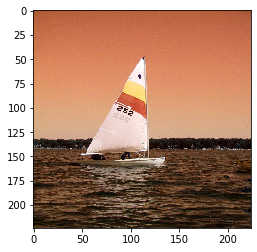

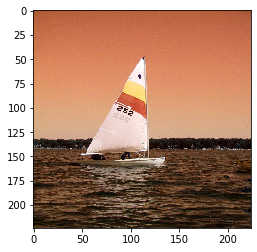

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


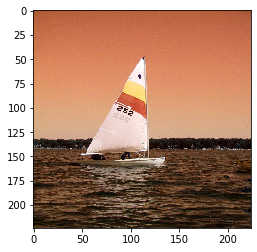

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
original = url_to_image(url, 224)
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)a
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

40960/35363 [==================================] - 0s 0us/step
catamaran 0.48919842
trimaran 0.29943764
yawl 0.20314288
schooner 0.007337052
space_shuttle 0.00024042289


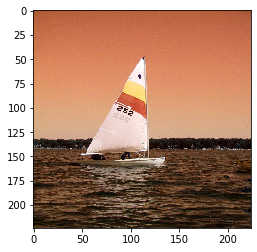

In [6]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
plt.imshow(original)
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])